In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix

y1 = np.load(f'MoCETSE/y_test_2.npy')
pred1 = np.load(f'MoCETSE/pred_test_2.npy')
prob1 = np.load(f'MoCETSE/prob_test_2.npy')
cm1 = confusion_matrix(y1, pred1)
print(cm1)

y2 = np.load(f'DeepSecE/y_test_2.npy')
pred2 = np.load(f'DeepSecE/pred_test_2.npy')
prob2 = np.load(f'DeepSecE/prob_test_2.npy')
cm2 = confusion_matrix(y2, pred2)
print(cm2)

[[131   0   9   4   6   0]
 [  0  19   0   0   0   1]
 [  1   0   9   0   0   0]
 [  1   0   0  29   0   0]
 [  0   0   0   0  30   0]
 [  0   0   0   2   0  18]]
[[134   0   9   3   3   1]
 [  0  18   0   1   0   1]
 [  3   0   6   0   1   0]
 [  1   0   0  29   0   0]
 [  1   0   0   1  28   0]
 [  1   0   0   2   0  17]]


In [4]:
print(cm1[:, 4])
print(cm2[:, 4])
print(cm1[:, 2])
print(cm2[:, 2])

[ 6  0  0  0 30  0]
[ 3  0  1  0 28  0]
[9 0 9 0 0 0]
[9 0 6 0 0 0]


In [5]:
import pandas as pd

cnn_t4se = pd.read_csv('data/CNNT4SE-Test-260.out.csv')
cnn_t4se['Protein_ID'] = cnn_t4se['Protein_ID'].apply(lambda x: int(x.split('_')[-1]))
cnn_t4se_pred = cnn_t4se[cnn_t4se['Is_effetor'] == 'YES']


In [6]:
def get_num_of_effector(pred, start, end):
    return len(pred[(pred['Protein_ID'] > start) & (pred['Protein_ID'] <= end)])

cnn_t4se_cm = [get_num_of_effector(cnn_t4se_pred, start, end) for (start, end) in [(0, 150), (150, 170), (170, 180), (180, 210), (210, 240), (240, 260)]]
print(cnn_t4se_cm)

t4sepp = [0, 2, 0, 4, 30, 2]
t4sefinder = [4, 6, 0, 21, 28, 7]
bastion4 = [6, 1, 0, 3, 29, 0]
bastionx = [15, 9, 2, 26, 30, 8]

print(t4sepp)
print(t4sefinder)
print(bastion4)
print(bastionx)

[1, 10, 0, 4, 29, 1]
[0, 2, 0, 4, 30, 2]
[4, 6, 0, 21, 28, 7]
[6, 1, 0, 3, 29, 0]
[15, 9, 2, 26, 30, 8]


In [7]:
t4se_cm_df = pd.DataFrame({'MoCETSE': cm1[:, 4], 'DeepSecE': cm2[:, 4], 'BastionX': bastionx, 'Bastion4': bastion4, 'CNN-T4SE': cnn_t4se_cm, 'T4SEfinder': t4sefinder, 'T4SEpp': t4sepp}, index=['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t4se_cm_df


,MoCETSE,DeepSecE,BastionX,Bastion4,CNN-T4SE,T4SEfinder,T4SEpp
Non-effector,6,3,15,6,1,4,0
T1SE,0,0,9,1,10,6,2
T2SE,0,1,2,0,0,0,0
T3SE,0,0,26,3,4,21,4
T4SE,30,28,30,29,29,28,30
T6SE,0,0,8,0,1,7,2


In [9]:
t3sepp = pd.read_table('data/T3SEpp-Test-260.out.txt')
t3sepp = t3sepp[t3sepp['Pred'] == 'T3S']
t3sepp_cm = [t3sepp['prot'].str.startswith('Non').sum(),
             t3sepp['prot'].str.startswith('T1SE').sum(),
             t3sepp['prot'].str.startswith('T2SE').sum(),
             t3sepp['prot'].str.startswith('T3SE').sum(),
             t3sepp['prot'].str.startswith('T4SE').sum(),
             t3sepp['prot'].str.startswith('T6SE').sum(),]

bastion3 = [8, 9, 0, 30, 12, 0]
bastionx = [14, 12, 2, 30, 30, 9]
t3se_cm_df = pd.DataFrame({'MoCETSE': cm1[:, 3], 'DeepSecE': cm2[:, 3], 'BastionX': bastionx, 'Bastion3': bastion3, 'T3SEpp': t3sepp_cm}, index=['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t3se_cm_df

,MoCETSE,DeepSecE,BastionX,Bastion3,T3SEpp
Non-effector,4,3,14,8,5
T1SE,0,1,12,9,9
T2SE,0,0,2,0,0
T3SE,29,29,30,30,26
T4SE,0,1,30,12,12
T6SE,2,2,9,0,8


In [10]:
t1sestacker = pd.read_table('data/T1SEstacker-Test-260.out.txt')
t1sestacker = t1sestacker[t1sestacker['pred'] == 'T1SE']
t1sestacker_cm = [t1sestacker['prot'].str.startswith('Non').sum(),
             t1sestacker['prot'].str.startswith('T1SE').sum(),
             t1sestacker['prot'].str.startswith('T2SE').sum(),
             t1sestacker['prot'].str.startswith('T3SE').sum(),
             t1sestacker['prot'].str.startswith('T4SE').sum(),
             t1sestacker['prot'].str.startswith('T6SE').sum(), ]

t1se_cm_df = pd.DataFrame({'MoCETSE': cm1[:, 1], 'DeepSecE': cm2[:, 1], 'T1SEstacker': t1sestacker_cm}, index=[
                          'Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t1se_cm_df


,MoCETSE,DeepSecE,T1SEstacker
Non-effector,0,0,8
T1SE,19,18,16
T2SE,0,0,2
T3SE,0,0,5
T4SE,0,0,2
T6SE,0,0,4


In [11]:
t2se_cm_df = pd.DataFrame({'MoCETSE': cm1[:, 2], 'DeepSecE': cm2[:, 2]}, index=[
                          'Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t2se_cm_df

,MoCETSE,DeepSecE
Non-effector,9,9
T1SE,0,0
T2SE,9,6
T3SE,0,0
T4SE,0,0
T6SE,0,0


In [12]:
bastion6 = pd.read_csv('data/Bastion6-Test-260.out.csv')
bastion6 = bastion6[bastion6['T6SE']=='Yes']
bastion6_cm = [bastion6['Name'].str.startswith('>Non').sum(),
             bastion6['Name'].str.startswith('>T1SE').sum(),
             bastion6['Name'].str.startswith('>T2SE').sum(),
             bastion6['Name'].str.startswith('>T3SE').sum(),
             bastion6['Name'].str.startswith('>T4SE').sum(),
             bastion6['Name'].str.startswith('>T6SE').sum(),]
bastionx = [20, 17, 0, 14, 3, 20]
t6se_cm_df = pd.DataFrame({'MoCETSE': cm1[:, 5], 'DeepSecE': cm2[:, 5], 'BastionX': bastionx, 'Bastion6': bastion6_cm}, index=['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t6se_cm_df

,MoCETSE,DeepSecE,BastionX,Bastion6
Non-effector,0,1,20,20
T1SE,1,1,17,17
T2SE,0,0,0,0
T3SE,0,0,14,24
T4SE,0,0,3,3
T6SE,18,17,20,20


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

/tmp/ipykernel_1005/3150923468.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .91, 1])


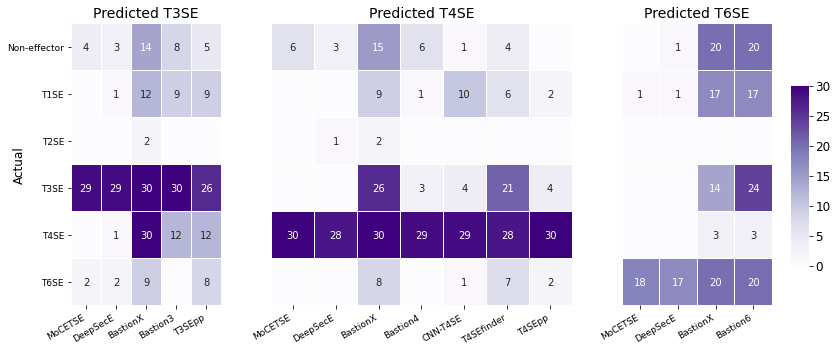

In [18]:

widths = [1, 2, 1] 


fig, axn = plt.subplots(
    1, 3, 
    figsize=(12, 5),
    gridspec_kw={"width_ratios": widths}  
)
cbar_ax = fig.add_axes([.92, .25, .02, .5])  


for i, (ax, df, label) in enumerate(zip(axn.flat, [t3se_cm_df, t4se_cm_df, t6se_cm_df], ['T3SE', 'T4SE', 'T6SE'])):
    sns.heatmap(
        df, 
        ax=ax,
        cbar=i == 0,          
        cmap='Purples', 
        vmin=0, vmax=30, 
        linewidth=1, 
        annot=True, 
        fmt=".0f",
        annot_kws={"fontsize": 10},
        cbar_ax=None if i else cbar_ax
    )
    
    ax.set_ylabel('Actual' if label == 'T3SE' else '')  
    ax.set_title(f'Predicted {label}')
    

    if label in ['T4SE', 'T6SE']:
        ax.set_yticklabels([]) 
        ax.yaxis.set_ticks_position('none')  
    

    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=9)

    if label == 'T3SE':
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
        ax.yaxis.set_label_coords(-0.30, 0.5)  
    

    for text in ax.texts:
        if int(text.get_text()) == 0:
            text.set_text("")


plt.tight_layout(rect=[0, 0, .91, 1])  
plt.subplots_adjust(wspace=0.25)  

plt.savefig('png/compare_specificity.png',dpi=600, bbox_inches='tight')
plt.show()

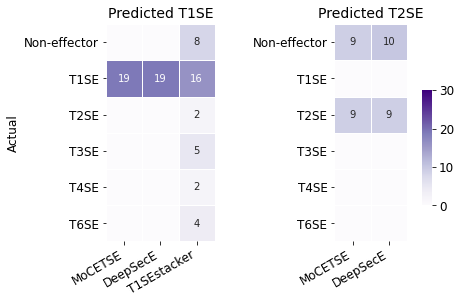

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

cbar_ax = fig.add_axes([.80, .25, 0.02, 0.4]) 

heatmap_kwargs = dict(cmap='Purples', vmin=0, vmax=30, linewidth=1, 
                      annot=True, fmt=".0f", square=True,
                      annot_kws={"fontsize": 10})

sns.heatmap(t1se_cm_df, ax=ax1, cbar=False, **heatmap_kwargs)
ax1.set_ylabel('Actual')
ax1.set_title('Predicted T1SE')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

sns.heatmap(t2se_cm_df, ax=ax2, cbar_ax=cbar_ax, **heatmap_kwargs)
ax2.set_title('Predicted T2SE')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')

for ax in [ax1, ax2]:
    for text in ax.texts:
        if text.get_text() == "0":
            text.set_text("")

plt.subplots_adjust(left=0.1, right=0.88, wspace=0.15)  

plt.savefig('png/compare_specificity_t1se_t2se.png', dpi=600, bbox_inches='tight')
plt.show()
